## Loan Prediction Project

The following activities needs to be done.
1. Data Exploration
2. Plot Corelation matrix to check for independence and dependence
3. Impute data
4. Compare statistics between Strategy of dropping rows with missing data vs imputing

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [49]:
df = pd.read_csv("../train_u6lujuX_CVtuZ9i.csv")
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [50]:
df['Dependents'] = df['Dependents'].astype('category', ordered=True, categories=['0', '1', '2', '3+'])
df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category', ordered=True,  categories=['Graduate', 'Not Graduate'])
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')
print(df.dtypes)

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object


C:\Users\nagmani\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
C:\Users\nagmani\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


In [51]:
ordinal_cols = ['Dependents', 'Loan_Status', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [52]:
df[ordinal_cols] = df[ordinal_cols].apply(lambda x: x.cat.codes)

In [55]:
df.to_csv('../encoded_df.csv', index=False)

In [53]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [12]:
df_ss = df.dropna()
print(df_ss['Loan_Status'].value_counts())
print(df['Loan_Status'].value_counts())

Y    332
N    148
Name: Loan_Status, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Distribution plot of 


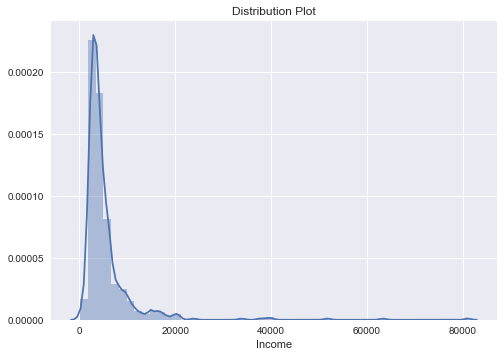

In [13]:
inc_plot = sns.distplot(df['ApplicantIncome'], axlabel='Income').set_title("Distribution Plot")
inc_plot
plt.show()

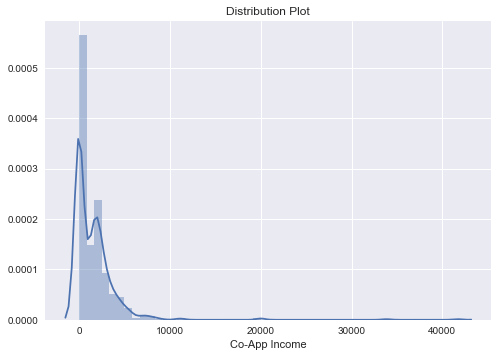

In [14]:
inc_plot = sns.distplot(df['CoapplicantIncome'], axlabel='Co-App Income').set_title("Distribution Plot")
inc_plot
plt.show()

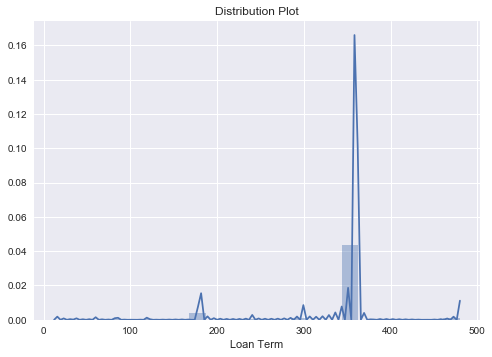

In [18]:

inc_plot = sns.distplot(df['Loan_Amount_Term'].dropna(), axlabel='Loan Term').set_title("Distribution Plot")
inc_plot
plt.show()

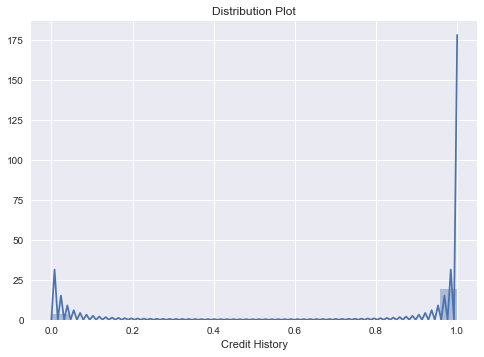

In [20]:

inc_plot = sns.distplot(df['Credit_History'].dropna(), axlabel='Credit History').set_title("Distribution Plot")
inc_plot
plt.show()

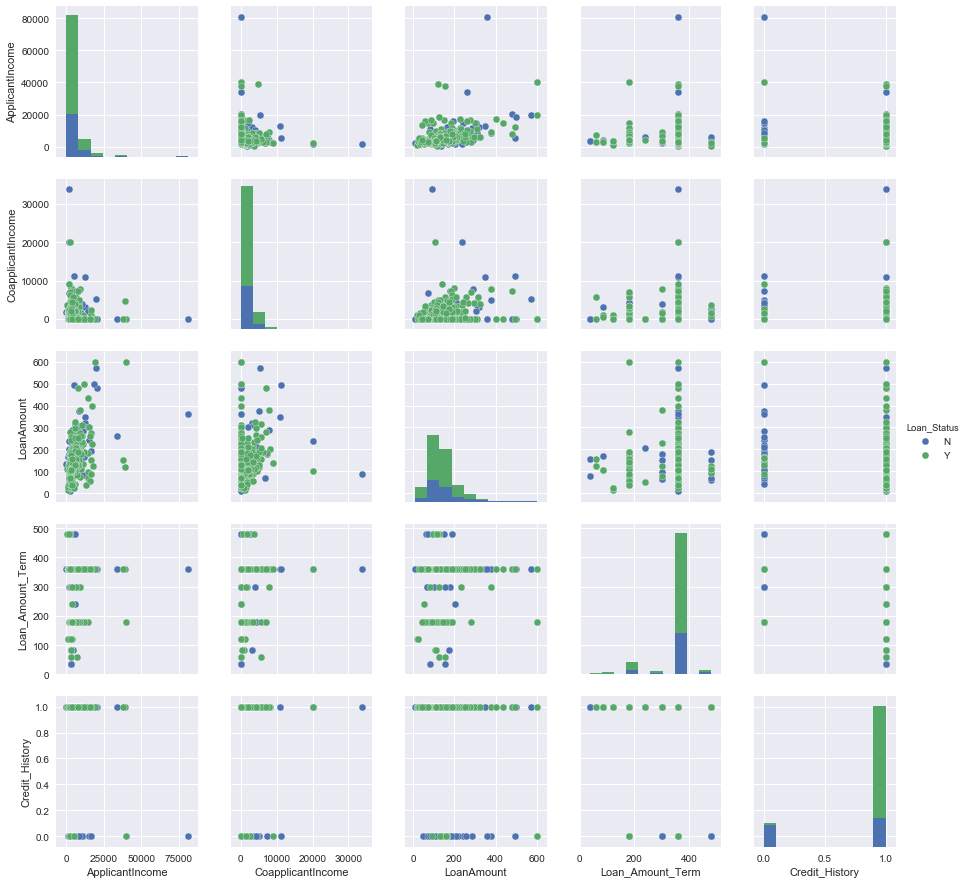

In [23]:
pair_plot = sns.pairplot(df.dropna(), hue = 'Loan_Status')
plt.show()

In [28]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

C:\Users\nagmani\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
cols = [ApplicantIncome 	CoapplicantIncome 	LoanAmount 	Loan_Amount_Term 	Credit_History]
df_ss = df.dropna()
train, test = 